In [60]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = None
import numpy as np
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'sklearn'

In [45]:
df=pd.read_csv('Semi_cleaned_data.csv')

In [46]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,referral_source,Diagnosis
0,29.0,F,f,f,f,f,f,f,f,t,f,f,f,f,f,f,t,0.3,f,NaN,f,NaN,f,NaN,f,NaN,other,-
1,29.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.6,t,1.9,t,128.0,f,NaN,f,NaN,other,-
2,41.0,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,other,-
3,36.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,other,-
4,32.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,other,S


# Outliers

<Axes: ylabel='age'>

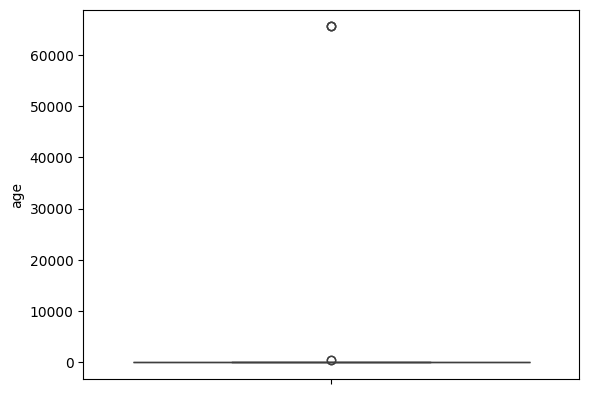

In [49]:
sns.boxplot(y=df['age'])

In [51]:
df[df['age']>100]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,referral_source,Diagnosis
2976,455.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.10,t,2.0,t,118.0,t,1.13,t,104.0,SVI,-
5710,65511.0,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.38,t,2.0,t,113.0,t,1.08,t,104.0,other,-
6392,65512.0,M,f,f,f,f,f,f,f,f,t,f,f,f,f,f,t,0.03,t,2.8,t,112.0,t,0.84,t,133.0,other,-
8105,65526.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.50,f,NaN,t,132.0,t,1.02,t,129.0,other,-
10536,455.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.10,t,2.0,t,118.0,t,1.13,t,104.0,SVI,-


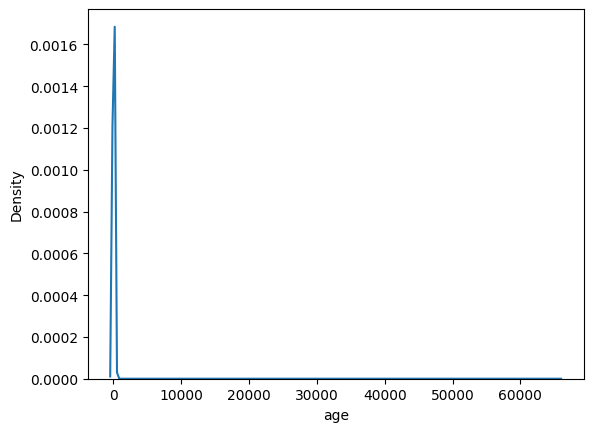

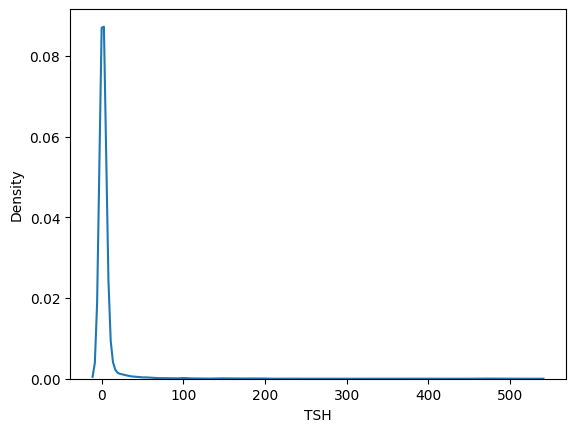

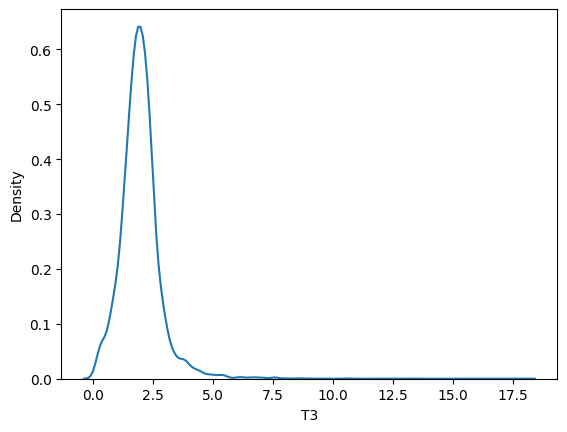

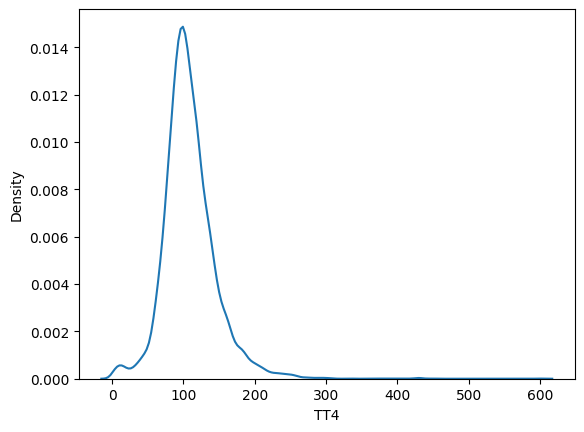

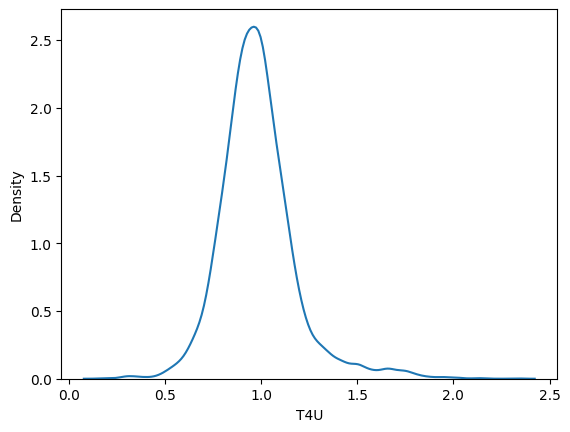

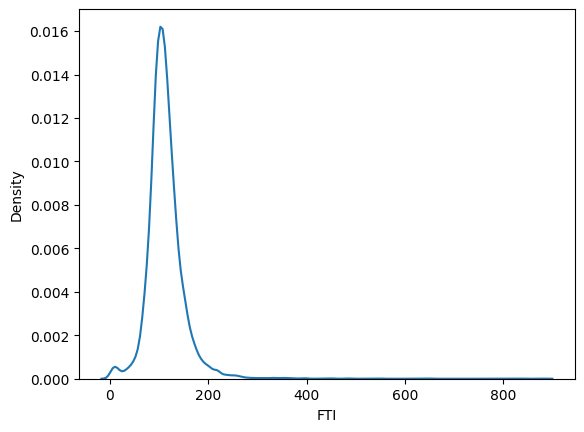

In [54]:
for i in  df.select_dtypes(exclude='object').columns:
    sns.kdeplot(x=df[i])
    plt.show()

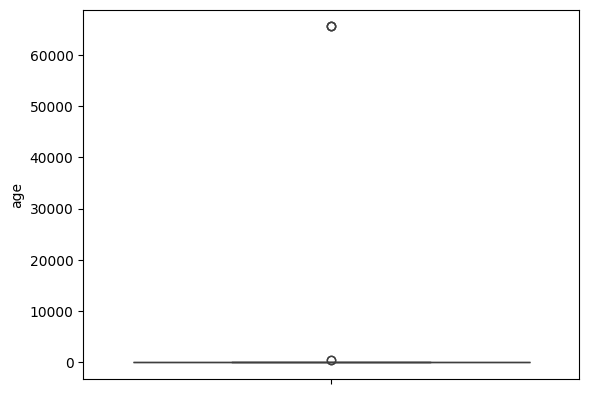

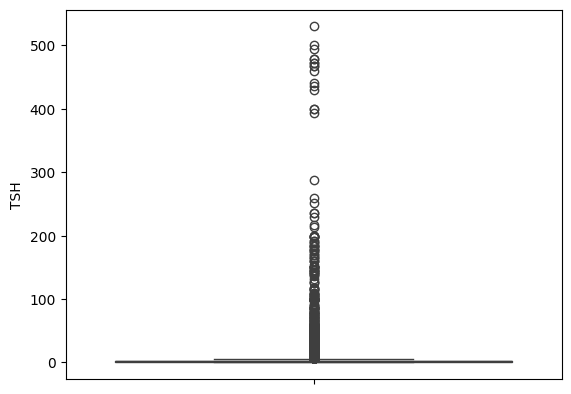

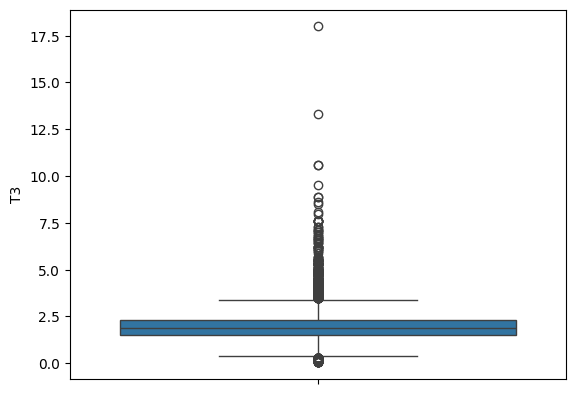

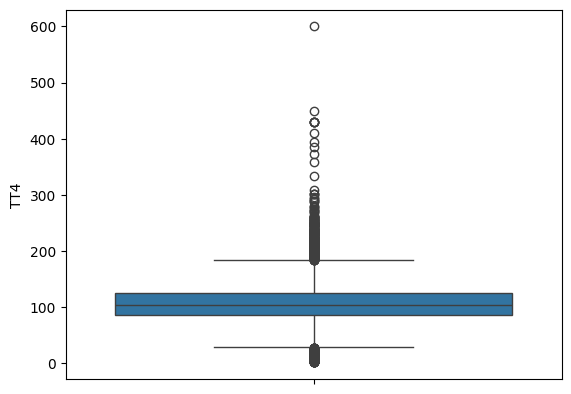

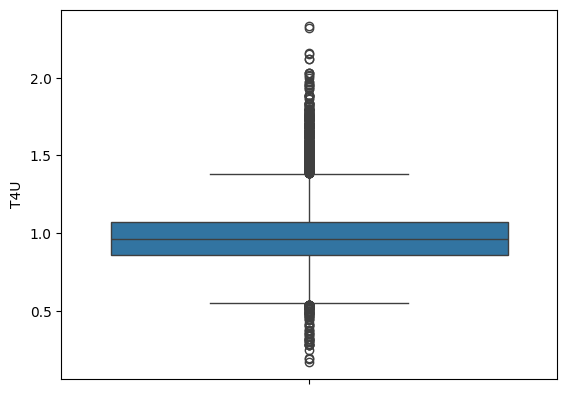

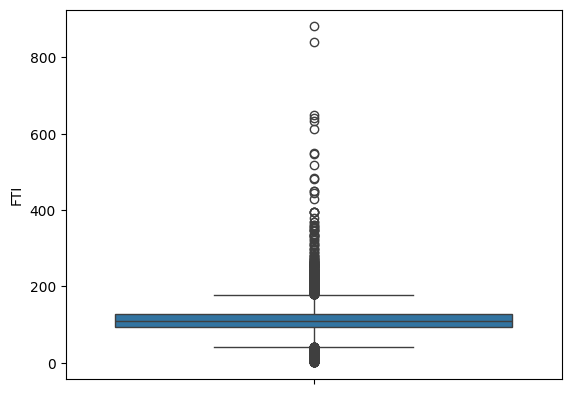

In [56]:
for i in  df.select_dtypes(exclude='object').columns:
    sns.boxplot(y=df[i])
    plt.show()

In [57]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'referral_source', 'Diagnosis'],
      dtype='object')

In [59]:
numeric_cols=df.select_dtypes(exclude='object').columns

In [ ]:
numeric_cols = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

# Applying MICE imputation
imputer = IterativeImputer(max_iter=10, random_state=0)
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])